In [32]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

# Load the feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

# Scale the feature matrix
X = utils.scale_feature_matrix(X)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Create the classifier
rf_classifier = SklearnClassifier(RandomForestClassifier, n_jobs=-1)

In [35]:
# Train the classifier
start = time.time()
rf_classifier.train(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

Training time:  5.1796770095825195


In [36]:
# Evaluate the classifier
rf_classifier.evaluate(X_test, y_test)

{'Precision': 0.5039941461037368,
 'Recall': 0.48118743527787367,
 'F1': 0.44083141944080645,
 'Accuracy': 0.48118743527787367}

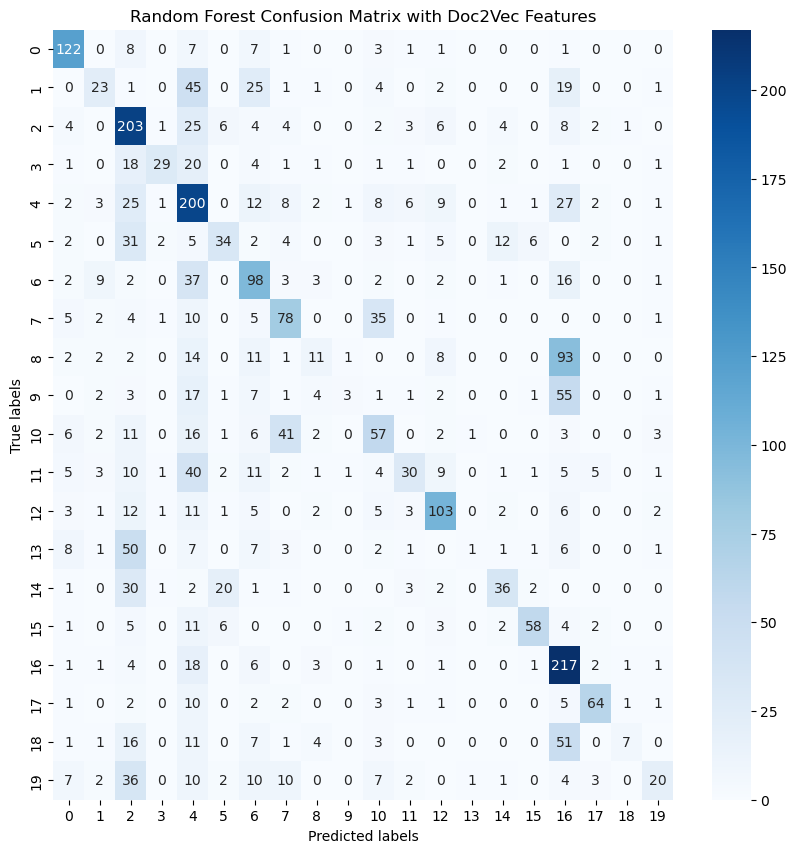

In [37]:
# Get the confusion matrix
rf_classifier.get_confusion_matrix(X_test, y_test, 'Random Forest Confusion Matrix with Doc2Vec Features')

In [38]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

# Load the feature matrix and labels for BERT
X = embeddings.get_bert()
y = embeddings.get_labels()

# no need to scale the feature matrix for BERT

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create the classifier
rf_classifier = SklearnClassifier(RandomForestClassifier, n_jobs=-1)

In [41]:
# Train the classifier
start = time.time()
rf_classifier.train(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

Training time:  4.9885170459747314


In [42]:
# Evaluate the classifier
rf_classifier.evaluate(X_test, y_test)

{'Precision': 0.6807939633955183,
 'Recall': 0.6630997583707283,
 'F1': 0.6544084682788421,
 'Accuracy': 0.6630997583707283}

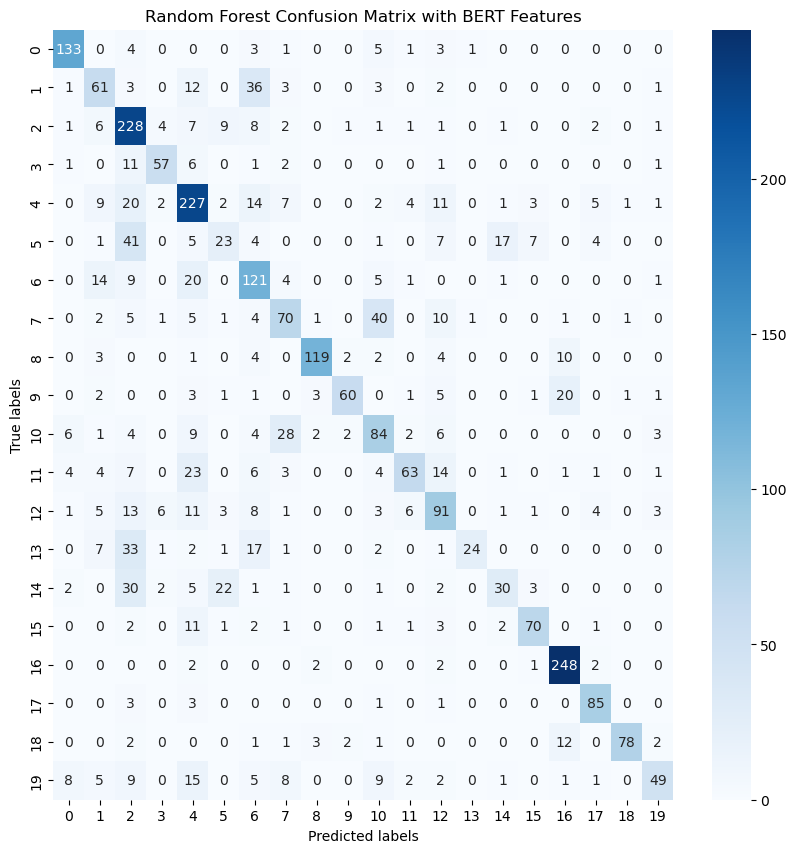

In [43]:
# Get the confusion matrix
rf_classifier.get_confusion_matrix(X_test, y_test, 'Random Forest Confusion Matrix with BERT Features')